In [58]:
!rm winequality-red.csv
!rm winequality-white.csv

rm: winequality-red.csv: No such file or directory
rm: winequality-white.csv: No such file or directory


In [59]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84199  100 84199    0     0  65986      0  0:00:01  0:00:01 --:--:-- 66038
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   129k      0  0:00:01  0:00:01 --:--:--  129k


In [1]:
#받은 와인 데이터 csv 파일을 확인할 수 있다. 
!ls | grep "wine*"

winequality-red.csv
winequality-white.csv


### <A. 와인의 데이터의 일부를 출력하여 확인하세요.>

In [20]:
import csv

#winequality-red.csv 파일을 utf-8 encoding으로 읽는다.
print("---------red 와인 데이터 10개 출력---------")
f = open('winequality-red.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
index = 0;
for line in rdr:
    print(line)
    index=index+1;
    if(index==11):
        break;
f.close()

---------red 와인 데이터 10개 출력---------
['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']
['7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5']
['7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5']
['7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5']
['11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6']
['7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5']
['7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5']
['7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5']
['7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7']
['7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7']
['7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5']


In [21]:
import csv

#winequality-white.csv 파일을 utf-8 encoding으로 읽습니다.
print("---------white 와인 데이터 10개 출력---------")
f = open('winequality-white.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
index = 0;
for line in rdr:
    print(line)
    index=index+1;
    if(index==11):
        break;
f.close()

---------white 와인 데이터 10개 출력---------
['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']
['7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6']
['6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6']
['8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6']
['7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6']
['7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6']
['8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6']
['6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6']
['7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6']
['6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6']
['8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;6']


### <B. 와인의 각 속성의 통계적 특성들 (평균, 분산, 최대값, 최소값 등)을 확인하세요.>

In [22]:
import numpy

print("---------red 와인 각 속성들의 통계적 특성 출력---------")

counter = 0;
names = []
# fixed acidity, volatile acidity, citric acid, residual sugar,
# chlorides, free sulfur dioxide, total sulfur dioxide, density,
# pH, sulphates, alcohol, quality 을 따로따로 나누기 위한 list 
arrays = [[],[],[],[],[],[],[],[],[],[],[],[]]

f = open('winequality-red.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)

for line in rdr:
    val = str(line[0]).split(";")

    for i in range(0,12):
        if(counter==0):
            names.append(val[i])
        else:
            arrays[i].append(float(val[i]))
    
    counter = counter+1

for i in range(0, 12):
    print(names[i].replace('"',"")+" mean(평균) : "+str(numpy.mean(arrays[i])))
    print(names[i].replace('"',"")+" var(분산) : "+str(numpy.var(arrays[i])))
    print(names[i].replace('"',"")+" std(표준편차) : "+str(numpy.std(arrays[i])))
    print(names[i].replace('"',"")+" max(최대값) : "+str(max(arrays[i])))
    print(names[i].replace('"',"")+" min(최소값) : "+str(min(arrays[i])))
    print("---------------------------------------------------")

f.close()


---------red 와인 각 속성들의 통계적 특성 출력---------
fixed acidity mean(평균) : 8.31963727329581
fixed acidity var(분산) : 3.0295205688671114
fixed acidity std(표준편차) : 1.7405518001102729
fixed acidity max(최대값) : 15.9
fixed acidity min(최소값) : 4.6
---------------------------------------------------
volatile acidity mean(평균) : 0.5278205128205128
volatile acidity var(분산) : 0.0320423261333205
volatile acidity std(표준편차) : 0.17900370424469014
volatile acidity max(최대값) : 1.58
volatile acidity min(최소값) : 0.12
---------------------------------------------------
citric acid mean(평균) : 0.2709756097560976
citric acid var(분산) : 0.03792375112494089
citric acid std(표준편차) : 0.19474021445233364
citric acid max(최대값) : 1.0
citric acid min(최소값) : 0.0
---------------------------------------------------
residual sugar mean(평균) : 2.53880550343965
residual sugar var(분산) : 1.9866539202698996
residual sugar std(표준편차) : 1.4094871124880495
residual sugar max(최대값) : 15.5
residual sugar min(최소값) : 0.9
-----------------------------

In [23]:
import numpy

print("---------white 와인 각 속성들의 통계적 특성 출력---------")

counter = 0;
names = []
# fixed acidity, volatile acidity, citric acid, residual sugar,
# chlorides, free sulfur dioxide, total sulfur dioxide, density,
# pH, sulphates, alcohol, quality 을 따로따로 나누기 위한 list 
arrays = [[],[],[],[],[],[],[],[],[],[],[],[]]

f = open('winequality-white.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)

for line in rdr:
    val = str(line[0]).split(";")

    for i in range(0,12):
        if(counter==0):
            names.append(val[i])
        else:
            arrays[i].append(float(val[i]))
    
    counter = counter+1

for i in range(0, 12):
    print(names[i].replace('"',"")+" mean(평균) : "+str(numpy.mean(arrays[i])))
    print(names[i].replace('"',"")+" var(분산) : "+str(numpy.var(arrays[i])))
    print(names[i].replace('"',"")+" std(표준편차) : "+str(numpy.std(arrays[i])))
    print(names[i].replace('"',"")+" max(최대값) : "+str(max(arrays[i])))
    print(names[i].replace('"',"")+" min(최소값) : "+str(min(arrays[i])))
    print("---------------------------------------------------")

f.close()


---------white 와인 각 속성들의 통계적 특성 출력---------
fixed acidity mean(평균) : 6.854787668436097
fixed acidity var(분산) : 0.7119681970549558
fixed acidity std(표준편차) : 0.8437820791264506
fixed acidity max(최대값) : 14.2
fixed acidity min(최소값) : 3.8
---------------------------------------------------
volatile acidity mean(평균) : 0.27824111882400976
volatile acidity var(분산) : 0.010157466769838475
volatile acidity std(표준편차) : 0.10078425854188974
volatile acidity max(최대값) : 1.1
volatile acidity min(최소값) : 0.08
---------------------------------------------------
citric acid mean(평균) : 0.33419150673744386
citric acid var(분산) : 0.014642802851506794
citric acid std(표준편차) : 0.12100744957029214
citric acid max(최대값) : 1.66
citric acid min(최소값) : 0.0
---------------------------------------------------
residual sugar mean(평균) : 6.391414863209474
residual sugar var(분산) : 25.720517863413225
residual sugar std(표준편차) : 5.071539989333933
residual sugar max(최대값) : 65.8
residual sugar min(최소값) : 0.6
---------------------

### <C. 와인의 12가지 속성 간의 상관관계를 heatmap 형태로 그려 분석하세요.>

---------red 와인 히트맵---------


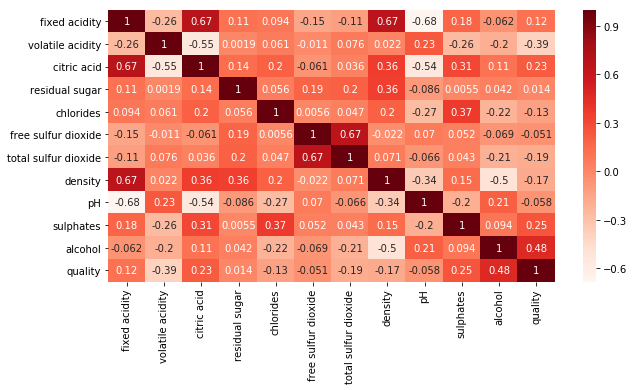

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("---------red 와인 히트맵---------")

path_to_csv= 'winequality-red.csv'
df= pd.read_csv(path_to_csv, sep=';')
plt.subplots(figsize=(10,5))
sns.heatmap(data = df.corr(), annot=True, cmap="Reds")

---------white 와인 히트맵---------


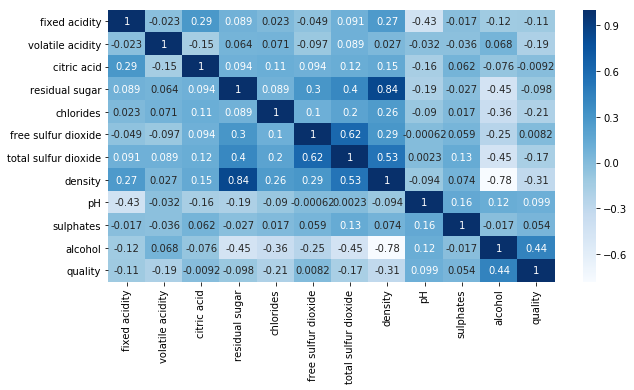

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("---------white 와인 히트맵---------")

path_to_csv= 'winequality-white.csv'
df= pd.read_csv(path_to_csv, sep=';')
plt.subplots(figsize=(10,5))
sns.heatmap(data = df.corr(), annot=True, cmap="Blues")

### <E. 훈련 집합과 시험 집합을 7:3으로 구분하여 선형회귀 모델을 적용하여 와인의 질을 예측, 분석해보세요.>

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()

# wine 데이터를 넣을 list
data = []

# red wine 데이터를 읽어옴
f = open('winequality-red.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
index = 0;
for line in rdr:
    data.append(line)
    index=index+1;
f.close()

# feature 와 target 을 넣을 리스트들
features = []
targets = []

# for문 인덱스 i를 1부터 시작하여,
# 라벨(fixed acidity, volatile acidity...)을 제외하고 진행하게 한다.
for i in range(1,len(data)):
    
    # 데이터가 세미콜론(;)으로 나눠져있기 때문에 그것을 기준으로 split 한다.
    # 가장 마지막 값은 quality, 즉 target 값이기 때문에 features 에는 넣지 않고
    # 대신 targets 에 넣는다.
    features.append(data[i][0].split(";")[:-1])
    targets.append(data[i][0].split(";")[-1:])
    
features = numpy.asarray(features, dtype=numpy.float32)
targets = numpy.asarray(targets, dtype=numpy.float32)

# features 와 targets 확인
print(features)
print(targets)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]


In [27]:
# train_test_split 함수는, features 와 targets 를 넣으면 알아서 데이터를 xtrain, ytrain, xtest, ytest 로 나눠준다.
# 게다가 셔플을 알아서 해줌으로써 똑같은 데이터들이 train data나 test data 어느 한 곳으로 몰려 학습을 방해하지 않도록 해준다.
# 예를 들어, features 가 [[a,b],[a,b],[a,b],[b,c],[b,c]] 이고
# targets 가 [1,1,1,2,2] 라고 할 때 셔플을 해주지 않으면
# train data x = [[a,b],[a,b],[a,b]]
# train data y = [1,1,1]
# test data x = [[b,c],[b,c]]
# test data y = [2,2]
# 이렇게 나눠져서 학습을 했지만 정작 테스트에서 정확도가 0이 나올 수 있기 때문에
# [[a,b],[a,b],[a,b],[b,c],[b,c]] [1,1,1,2,2] 이 데이터를 셔플하여
# [[a,b],[b,c],[a,b],[b,c],[a,b]] [1,2,1,2,1] 이런 모습으로 만들어야 한다. 

# train data와 test data의 비율을 test_size 인자를 통해 조절 가능하다.

# random_state 는 random number 를 만드는 seed이다.
# 즉, random_state 의 정수값을 기준으로 random operation 이 실행된다.
# 이해를 돕기 위해 hash func 을 예로 들어 본다.
# hash func 의 인자로 1을 줬을 때 abc 가 나왔다고 하자. abc = h(1)
# hash func 의 인자로 2를 줬을 때 hap 가 나왔다고 하자. hap = h(2)
# hash func 의 인자로 5를 줬을 때 py! 가 나왔다고 하자. py! = h(5)
# 이렇게 동작하는 hash func 처럼, random 값을 만드는 인자값이 random_state 라고 보면 된다.
# rand func 의 인자로 1을 줬을 때 0.3 이 나왔다고 하자. 0.3 = r(1)
# rand func 의 인자로 2를 줬을 때 0.998 이 나왔다고 하자. 0.998 = r(2)
# rand func 의 인자로 5를 줬을 때 0.46 이 나왔다고 하자. 0.46 = r(5)
# 이런 식으로 random 값을 만드는 rand func 에 seed 를 주면 그것을 기준으로 random 값이 튀어나온다.
# hash func와 마찬가지로 똑같은 인자(똑같은 seed) 를 주면 똑같은 hash 값(똑같은 random 값) 이 나온다.
# 여기서의 random_state 는, 셔플할 때 어떻게 섞을지에 대한 랜덤값을 위한 seed 이다.
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3, random_state=2)

# lm(linear regression) 의 fit 메소드에 x train와 y train 을 넣음으로써 선형회귀 학습을 진행한다.
# 학습을 마친 후, lm 은 학습된 모델로써 역할을 하게 된다. 
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#Mean squared error 를 계산하여 정확도를 측정해본다.
print(mean_squared_error(lm.predict(X_test),Y_test))

0.4174587


In [31]:
# 이번엔 white wine 데이터를 사용해본다.
# wine 데이터를 넣을 list
data = []

# white wine 데이터를 읽어옴
f = open('winequality-white.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
index = 0;
for line in rdr:
    data.append(line)
    index=index+1;
f.close()

features = []
targets = []

for i in range(1,len(data)):
    features.append(data[i][0].split(";")[:-1])
    targets.append(data[i][0].split(";")[-1:])
    
features = numpy.asarray(features, dtype=numpy.float32)
targets = numpy.asarray(targets, dtype=numpy.float32)

print(features)
print(targets)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
[[6.]
 [6.]
 [6.]
 ...
 [6.]
 [7.]
 [6.]]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3, random_state=2)
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print(mean_squared_error(lm.predict(X_test),Y_test))

0.5852348
